In [3]:
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tf

from flyeye.data import Experiment

from figures.images import RatioImage
from figures.spatial import Correlation, Periodogram, R8Spacing

%matplotlib inline

data_path = '../data/published/'

# Load Notch ts data

In [4]:
# instantiate Experiment objects
notch_control = Experiment(join(data_path, 'notch_ts', '18c'), normalization='ch2', recompile=True)
notch_perturbation = Experiment(join(data_path, 'notch_ts', '28c'), normalization='ch2', recompile=True)

# add P/Y ratio to cell data
notch_control.set_ratio('ch1_normalized', 'ch0_normalized')
notch_perturbation.set_ratio('ch1_normalized', 'ch0_normalized')

# manually align discs
notch_control.apply_lag(10.5)
notch_perturbation.apply_lag(8)
notch_perturbation.discs[2].apply_lag(1)

# Figure 5 A, B, and Fig 5 S1

In [12]:
bit_depth = 2**16

# fluorescence images for S1
im_control_yan = tf.imread(join(data_path, 'notch_ts/microscopy/control/yan.tif')).astype(np.float64) / bit_depth
im_control_pnt = tf.imread(join(data_path, 'notch_ts/microscopy/control/pnt.tif')).astype(np.float64) / bit_depth
im_perturbation_yan = tf.imread(join(data_path, 'notch_ts/microscopy/perturbation/yan.tif')).astype(np.float64) / bit_depth
im_perturbation_pnt = tf.imread(join(data_path, 'notch_ts/microscopy/perturbation/pnt.tif')).astype(np.float64) / bit_depth

# ratio images for Figure 5 A,B
saturation = 2.0
control = RatioImage(im_control_pnt, im_control_yan, saturation)
perturbation = RatioImage(im_perturbation_pnt, im_perturbation_yan, saturation)

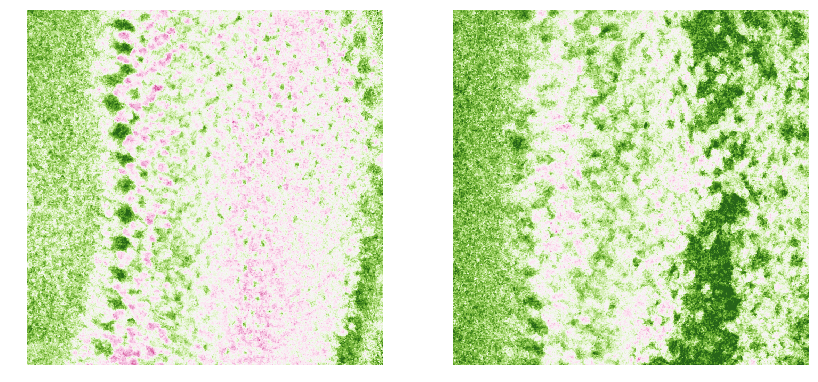

In [19]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(14, 7))
ax0.imshow(control.images['ratio'])
ax1.imshow(perturbation.images['ratio'])
for ax in (ax0, ax1):
    ax.axis('off')

# Figure 5 C, F

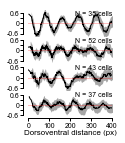

In [17]:
# Fig 5C (notch active)
fig = Correlation(notch_control)
fig.render(tmin=0, tmax=1.75)

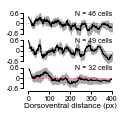

In [4]:
# Fig 5F (notch restricted)
fig = Correlation(notch_perturbation)
fig.render(tmin=0, tmax=1.75)

# Figure 5 D, G

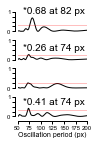

In [5]:
# Fig 5D (notch active)
fig = Periodogram(notch_control)
fig.render(tmin=0, tmax=1.75)

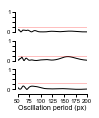

In [6]:
# Fig 5G (notch inactive)
fig = Periodogram(notch_perturbation)
fig.render(tmin=0, tmax=1.75)

# Figure 5 E

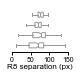

In [18]:
fig = R8Spacing(notch_control)
fig.render()